In [1]:
import Plots
using LinearAlgebra

# On using second order methods

In this notebook you will learn to use the gradients and the second order methods.

Remember, the basics of this notebook is the decomposition of the loss function - we use the parameter vector $\theta$ for all possible parameters - into a polynomial series [Taylor series from Wolfram](https://mathworld.wolfram.com/TaylorSeries.html) (see also Deisenroth et.al, pp 165-170):
$$
L(D | \theta,{\cal{F}}) \approx L(D\ | \theta_0,{\cal{F}}) + \nabla_\theta L(D |\theta_0,{\cal{F}}) (\theta-\theta_0) + 
 \frac{1}{2} (\theta-\theta_0)^T H_\theta L(D |\theta_0,{\cal{F}}) (\theta-\theta_0)
$$
where $\theta_0$ is the starting point -- the center, and the ingredients are the Jacobian and the Hessian of the _loss function_ at the center position.

## Illustration: Taylor expansion for one parameter

To illustrate the Taylor expansion, let us consider the one-dimensional case: let $f(x|a)$ be the _"loss function"_ and let the _parameter_ be $x$.
The Taylor expansion is rewritten as 
$$
  f(x) \approx f(x_0) + f'(x_0) dx + \frac{1}{2}f''(x_0) dx^2, \ \text{ where }\ dx=x-x_0
$$
where we have the first and second derivatives of he function and $dx$ is the displacement of the parameter.

The stable point of the above approximation is at 
$$
  dx = - \frac{f'(x_0)}{f''(x_0)},
$$
meaning that the __natural gradient__ ''learning'' of the parameters is:
$$
  x_{t+1} = x_t - - \frac{f'(x_t)}{f''(x_t)}.
$$
For this to be a solution, we need  the __second derivative__ to be positive.

## The Newton method for computing the square root

Let us consider the following function to minimize:
$$
  f(x|a) = x^3/3 - ax
$$

If we apply the Taylor series expansion to the above function around a __positive__ value $x_0$, we get 
$$
  f'(x,a) = x^2-a,\ f''(x,a) = 2 x,
$$
and the natural gradient as:
\begin{align}
  x_{t+1} &=& x_t - - \frac{x_t^2-a}{2 x_t}\\
    &=& \frac{1}{2}\left(x_t + \frac{a}{x^t}\right).
\end{align}

The above formula is the well known __Newton iteration__ for computing the square root.

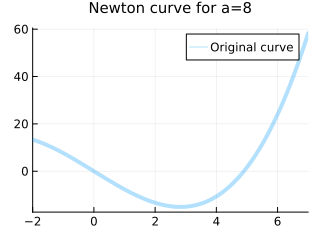

In [2]:
a=8
pol_3(x,a) = x^3/3 -x*a

p = Plots.plot(z->pol_3(z,a),
    xlim=(-2,7), size=(320,240),
    titlefontsize=10,label="Original curve",
    title="Newton curve for a=$a",w=4,alpha=.3
)

## Illustrating the Newton step

In what follows we consider an __initial point__ and reconstruct the Taylor approximation around that point.

First we define the first and the second derivatives of ```pol_3```.

In [3]:
d_pol_3(x,a)  = x^2 - a

dd_pol_3(x,a) = 2*x
;

In [4]:
x₀   = 1
f₀   = pol_3(x₀,a)
df₀  = d_pol_3(x₀,a)
ddf₀ = dd_pol_3(x₀,a)
;

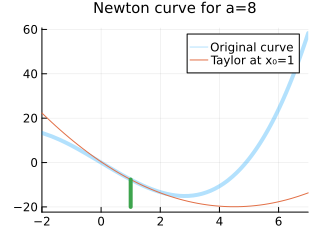

In [5]:
Plots.plot!(p, 
    x->f₀+(x-x₀)*df₀+(x-x₀)^2*ddf₀/2,
    width=1,
    label="Taylor at x₀=$x₀"
)
Plots.plot!(p,[x₀,x₀],[-20,f₀],w=4,label=false)

Computing the minimum of the Taylor approximation and plotting the parabola together with the location of the minimum.


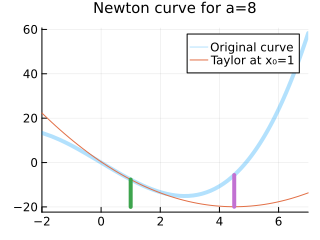

In [6]:
x₁ = x₀ - df₀ / ddf₀

Plots.plot!(p,
    [x₁,x₁],[pol_3(x₁,a),f₀-df₀^2/ddf₀/2],
    w=4,label=false
)

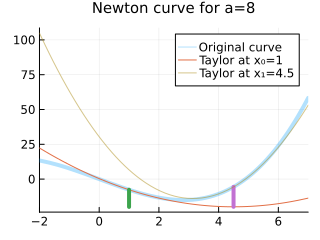

In [7]:
f₁   = pol_3(x₁,a)
df₁  = d_pol_3(x₁,a)
ddf₁ = dd_pol_3(x₁,a)

x₂ = x₁ - df₁ / ddf₁

Plots.plot!(p, 
    x->f₁+(x-x₁)*df₁+(x-x₁)^2*ddf₁/2,
    width=1,alpha=.5,
    label="Taylor at x₁=$x₁"
)

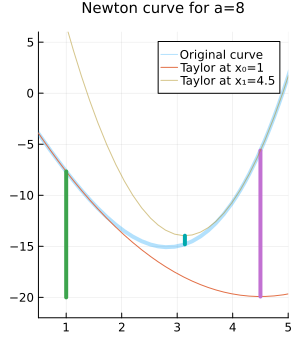

In [8]:
Plots.plot!(p,
    [x₂,x₂],[pol_3(x₂,a),f₁-df₁^2/ddf₁/2],
    w=4,label=false,
    size=(300,350),xlim=(.5,5),ylim=(-22,6))

## Interpreting the results

Above - the first iteration on the left-hand side, the zoom-in into the series approximation on the right - we see an illustration of the newton approximation.

We see that:

1. the step size is computed automatically and there is no need for the __learning rate__ $\alpha$;

1. the iterations oscillate around the minimum;

1. __WARNING__ the iterations are valid as long as the second derivative is positive. <br/>
For the __square root__ algorithm one might say that:
   1. if $a>0$ and starting point $x_0>0$, then the algorithm is in a convex region of the function.
   
   1. if $x_0<0$, then the algorithm converges to $-\sqrt{a}$.

## Defining an iterator function that  computes the elements of the series


In [9]:
"""
    iter_f(f,n,x₀) - iterates the function "f" the specified number of times.

    The result is a vector of 'n+1' elements that stores "[x₀,f(x₀),f(f(x₀)),...]"
"""
function iter_f(f,n::Integer,x₀::T) where T <: Real
    vcat([x₀],[x₀=f(x₀) for _ in 1:n]...)
end
;

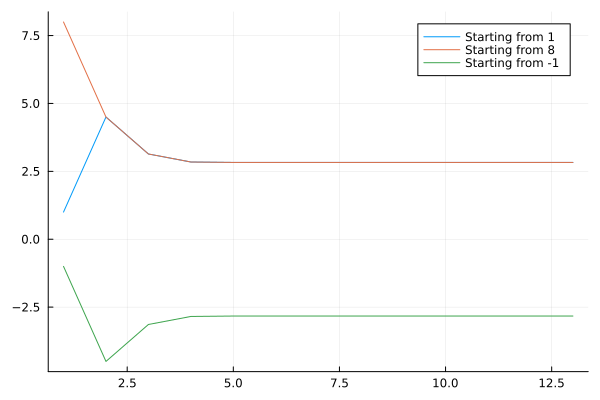

In [10]:
# defining the NEWTON ITERATION

newton_1 = x->x-d_pol_3(x,a)/dd_pol_3(x,a)

# PLOTTING THE CONVERGENCE 

p = Plots.plot( iter_f(newton_1,12,1),label="Starting from 1" )
Plots.plot!(p, iter_f(newton_1,12,a), label="Starting from $a" )
Plots.plot!(p, iter_f(newton_1,12,-1),label="Starting from -1" )

# Your problems

Write your solutions into a different notebook.

## Simplify and study the above formalism (2p)

1. Show that the update function
  ```julia
  f(x) = x - d_pol_3(x,a)/dd_pol_3(x,a)
  ```
  can be written as
  $$
  x_{n+1} \leftarrow \frac{1}{2}\left( x_n + \frac{a}{x_n}\right)
  $$

1. Use the mathematical notation from above and show that <br/>
   If $x_0>0$, then the limit of the iterations, $n\rightarrow\infty$, the algorithm converges to $\sqrt{a}$

## Study the convergence of a "modified" Newton algorithm (4p)

Consider the following function to minimize:
$$
  f_2(x|a) = \frac{1}{2} \left(x^2 - a\right)^2
$$

1. For the optimizer as above, compute -- and simplify the update function
$$
  x_{n+1} \leftarrow x_n - \frac{f'_2(x|a) }{f''_2(x|a)}
$$

1. Test whether the limit of the iterations is $\sqrt{a}$ for all inputs

1. If not, define the regions where the "__correct__" limiting values are achieved.

1. Relate the regions with the second derivative of the function.

## Define an algorithm for computing the $k$-th root of a positive number $a$ (4p)

Use the intuition from above, define a cost function, and find a second order step that will help solving the 
$$
x = \sqrt[k]{a}
$$
that means to find the value for which $x^k=a$

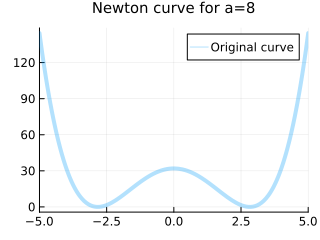

In [14]:
Plots.plot(z->1/2*(z^2-a)^2,
    xlim=(-5,5), size=(320,240),
    titlefontsize=10,label="Original curve",
    title="Newton curve for a=$a",w=4,alpha=.3
)